In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/flat.csv', usecols=[1, 2, 3])
df = df.rename(columns={'SQUARE_METERS': 'sqr', 'METRO_DISTANCE': 'dist', 'PRICE': 'price'})
df

,sqr,dist,price
0,28,677,7328400
1,54,120,9754600
2,43,1344,6781500
3,33,1003,6784100
4,30,591,7296200
...,...,...,...
95,28,2073,4826700
96,63,2120,6800800
97,33,1411,6517500
98,47,1715,6812100


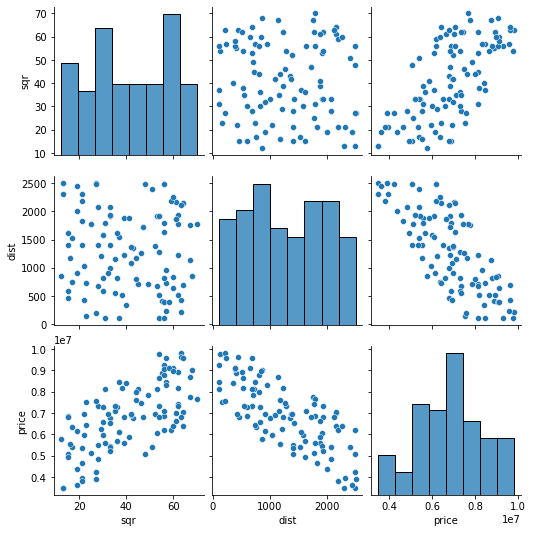

In [3]:
sns.pairplot(df)

Похоже на данные, которые сгенерированы искуственно

In [4]:
df.corr()

,sqr,dist,price
sqr,1.000000,-0.054016,0.672473
dist,-0.054016,1.000000,-0.759999
price,0.672473,-0.759999,1.000000


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
def mean_absolute_percentage_error(y_true, y_pred):
    s = 0
    n = len(y_true)
    for i in range(n):
        s += np.abs((y_true[i] - y_pred[i]) / y_true[i]) / n * 100
    return s

def mean_percetage_error(y_true, y_pred):
    s = 0
    n = len(y_true)
    for i in range(n):
        s += (y_true[i] - y_pred[i]) / y_true[i] / n * 100
    return s

def absolute_deviation(y_true, y_pred):
    m = y_true.mean()
    return np.sum(np.abs(y_pred - m))

def mean_absolute_deviation(y_true, y_pred):
    m = y_true.mean()
    return np.mean(np.abs(y_pred - m))

def tayl(y_true, y_pred):
    diff = y_true - y_pred
    np.sqrt(diff.dot(diff)/(y_true.dot(y_true) + y_pred.dot(y_pred)))

In [7]:
class My_transformer:
    def __init__(self, cols):
        self.cols = cols
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        return X[:, self.cols]

In [8]:
X = df[['sqr', 'dist']].values
y = df['price'].values

In [9]:
ests = [make_pipeline(My_transformer([0]), LinearRegression()), make_pipeline(My_transformer([1]), LinearRegression()), make_pipeline(My_transformer([0, 1]), LinearRegression())]

Модель 1:
	mae 990261.942495025
	rmse 1141985.1272904896
	r2 0.45222058564965095
	mape 15.693792634540442
	mpe 15.693792634540442
	ad 91939101.20964509
	mad 919391.0120964509
	tayl None
Модель 2:
	mae 870605.1584099769
	rmse 1002814.0345235703
	r2 0.5775983380546676
	mape 13.780389955268438
	mpe 13.780389955268438
	ad 101989176.67189087
	mad 1019891.7667189087
	tayl None
Модель 3:
	mae 188069.83565566633
	rmse 231660.84415639358
	r2 0.9774581227423352
	mape 2.8459159522276813
	mpe 2.8459159522276813
	ad 121653918.61100903
	mad 1216539.1861100902
	tayl None


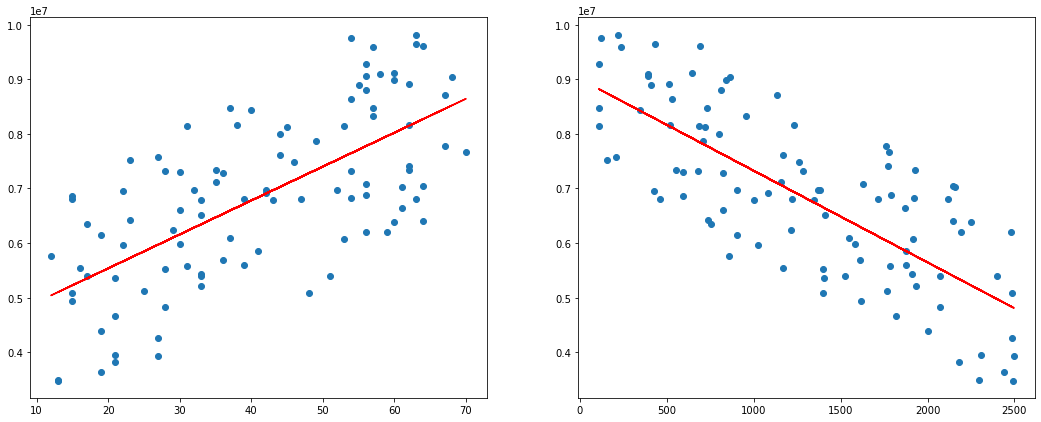

In [10]:
plt.figure(figsize=(18, 7))
for i, est in enumerate(ests):
    est.fit(X, y)
    y_pred = est.predict(X)
    if i < 2:
        plt.subplot(1, 2, i+1)
        x = est.steps[0][1].transform(X).flatten()
        plt.plot(x, y_pred, c='red')
        plt.scatter(x, y)
    
    print(f'Модель {i+1}:')
    print('\tmae', mean_absolute_error(y, y_pred))
    print('\trmse', np.sqrt(mean_squared_error(y, y_pred)))
    print('\tr2', r2_score(y, y_pred))
    print('\tmape', mean_absolute_percentage_error(y, y_pred))
    print('\tmpe', mean_absolute_percentage_error(y, y_pred))
    print('\tad', absolute_deviation(y, y_pred))
    print('\tmad', mean_absolute_deviation(y, y_pred))
    print('\ttayl', tayl(y, y_pred))
    

# Задание 9

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xml.etree import ElementTree

In [3]:
tree = ElementTree.parse('electric power.xml')

In [4]:
root = tree.getroot()

In [5]:
A = np.empty((len(root), 3), dtype=object)
for i in range(A.shape[0]):
    for j in range(3):
        A[i][j] = root[i][j].text
A

array([['243887', '01.01.2009 0:00:00.000000', '1'],
       ['243068', '01.01.2009 0:00:00.000000', '2'],
       ['242266', '01.01.2009 0:00:00.000000', '3'],
       ...,
       ['369646', '31.12.2010 0:00:00.000000', '22'],
       ['365917', '31.12.2010 0:00:00.000000', '23'],
       ['362311', '31.12.2010 0:00:00.000000', '24']], dtype=object)

In [6]:
df = pd.DataFrame(data=A, columns=['target', 'date', 'hour'])
df

,target,date,hour
0,243887,01.01.2009 0:00:00.000000,1
1,243068,01.01.2009 0:00:00.000000,2
2,242266,01.01.2009 0:00:00.000000,3
3,242659,01.01.2009 0:00:00.000000,4
4,243724,01.01.2009 0:00:00.000000,5
...,...,...,...
17513,371835,31.12.2010 0:00:00.000000,20
17514,370674,31.12.2010 0:00:00.000000,21
17515,369646,31.12.2010 0:00:00.000000,22
17516,365917,31.12.2010 0:00:00.000000,23


In [17]:
df['target'] = df['target'].astype(float)
df['date'] = df['date'].astype('datetime64')
df['hour'] = df['hour'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17518 entries, 0 to 17517
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   target  17518 non-null  float64       
 1   date    17518 non-null  datetime64[ns]
 2   hour    17518 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 342.3 KB


In [19]:
df.sort_values(by=['date', 'hour'], inplace=True)
df

,target,date,hour
0,243887.0,2009-01-01,1
1,243068.0,2009-01-01,2
2,242266.0,2009-01-01,3
3,242659.0,2009-01-01,4
4,243724.0,2009-01-01,5
...,...,...,...
17513,371835.0,2010-12-31,20
17514,370674.0,2010-12-31,21
17515,369646.0,2010-12-31,22
17516,365917.0,2010-12-31,23


In [20]:
df['hour'].value_counts().sort_index()

1     730
2     730
3     728
4     730
5     730
6     730
7     730
8     730
9     730
10    730
11    730
12    730
13    730
14    730
15    730
16    730
17    730
18    730
19    730
20    730
21    730
22    730
23    730
24    730
Name: hour, dtype: int64

# Анализ

In [21]:
df2 = df.groupby(by='date')['target'].sum().reset_index().sort_values(by=['date'])
#df2['weekday'] = df2['date'].map(lambda x: x.weekday())
df2

,date,target
0,2009-01-01,5830312.0
1,2009-01-02,5597619.0
2,2009-01-03,5825879.0
3,2009-01-04,5410538.0
4,2009-01-05,4225877.0
...,...,...
725,2010-12-27,6624696.0
726,2010-12-28,7543819.0
727,2010-12-29,8790105.0
728,2010-12-30,8876376.0


In [22]:
df2.describe()

,target
count,7.300000e+02
mean,5.610826e+06
std,1.781139e+06
min,1.698778e+06
25%,4.152362e+06
50%,5.636758e+06
75%,7.186316e+06
max,8.950708e+06


## Картина

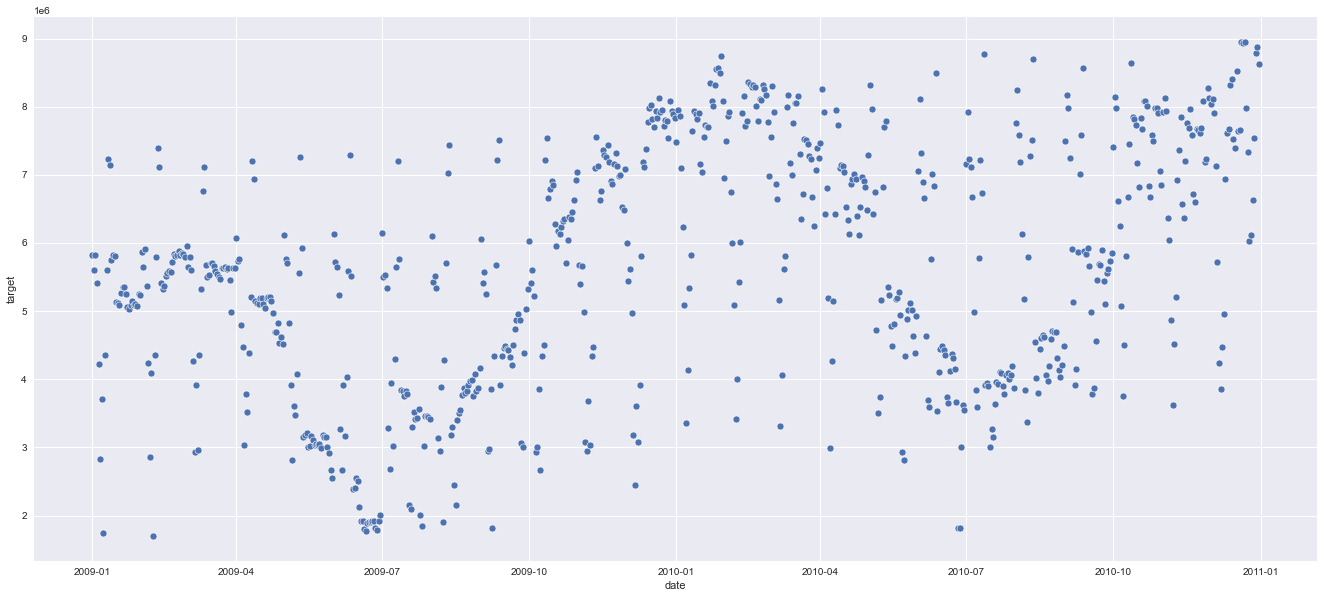

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=(23, 10))
sns.scatterplot(data=df2, x='date', y='target', palette='Set2')

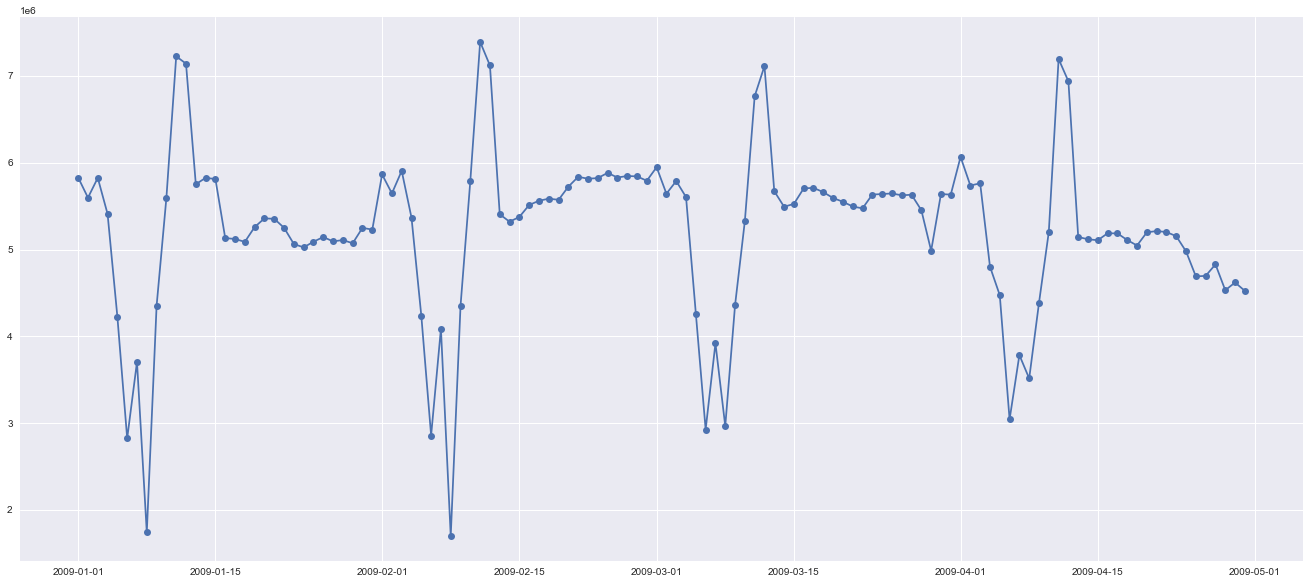

In [24]:
plt.style.use('seaborn')
plt.figure(figsize=(23, 10))
plt.plot(df2.iloc[0:120]['date'], df2.iloc[0:120]['target'], marker='o')

# Построение модели

In [25]:
train_df = df2.iloc[:-7].copy().reset_index()
test_df = df2.iloc[-7:].copy().reset_index()
y_train = train_df['target'].values
y_test = test_df['target'].values
train_df, test_df

(     index       date     target
 0        0 2009-01-01  5830312.0
 1        1 2009-01-02  5597619.0
 2        2 2009-01-03  5825879.0
 3        3 2009-01-04  5410538.0
 4        4 2009-01-05  4225877.0
 ..     ...        ...        ...
 718    718 2010-12-20  8950708.0
 719    719 2010-12-21  8939811.0
 720    720 2010-12-22  8950070.0
 721    721 2010-12-23  7985434.0
 722    722 2010-12-24  7331580.0
 
 [723 rows x 3 columns],
    index       date     target
 0    723 2010-12-25  6036305.0
 1    724 2010-12-26  6122948.0
 2    725 2010-12-27  6624696.0
 3    726 2010-12-28  7543819.0
 4    727 2010-12-29  8790105.0
 5    728 2010-12-30  8876376.0
 6    729 2010-12-31  8631863.0)

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def day_type(date):
    if date.day >= 1 and date.day <= 4:
        return 0
    elif date.day == 5 or date.day == 9:
        return 1
    elif date.day > 5 and date.day < 9:
        return 2
    elif date.day == 10 or date.day >= 13:
        return 3
    elif date.day == 11 or date.day == 12:
        return 4
    
def day_type2(date):
    return date.day
    
class My_transformer2:
    def __init__(self, fun):
        self.fun = fun
        
    def fit_transform(self, df):
        X = np.hstack([df[['index']].values, df['date'].map(self.fun).values.reshape(-1, 1), df['date'].map(lambda x: x.month).values.reshape(-1, 1)])
        self.ohe = OneHotEncoder()
        return np.hstack([X[:, 0:1], self.ohe.fit_transform(X[:, 1:]).toarray()])
    
    def transform(self, df):
        X = np.hstack([df[['index']].values, df['date'].map(self.fun).values.reshape(-1, 1), df['date'].map(lambda x: x.month).values.reshape(-1, 1)])
        return np.hstack([X[:, 0:1], self.ohe.transform(X[:, 1:]).toarray()])
    
def mean_absolute_percentage_error(y_true, y_pred):
    s = 0
    n = len(y_true)
    for i in range(n):
        s += np.abs((y_true[i] - y_pred[i]) / y_true[i]) / n * 100
    return s

Модель 1:
	Размер признакового пространства (723, 18)
	mse(train): 987252.9922830894
	mse(test): 1186270.3097377387
	r2(train): 0.690570382463312
	r2(test): -0.021389113231681467
	mape(train): 17.09917801343928
	mape(test): 15.475321798018964
Модель 2:
	Размер признакового пространства (723, 44)
	mse(train): 970493.8672119213
	mse(test): 1140481.1832864983
	r2(train): 0.7009866671512615
	r2(test): 0.05593879496891574
	mape(train): 16.832217422056782
	mape(test): 14.563477380365295


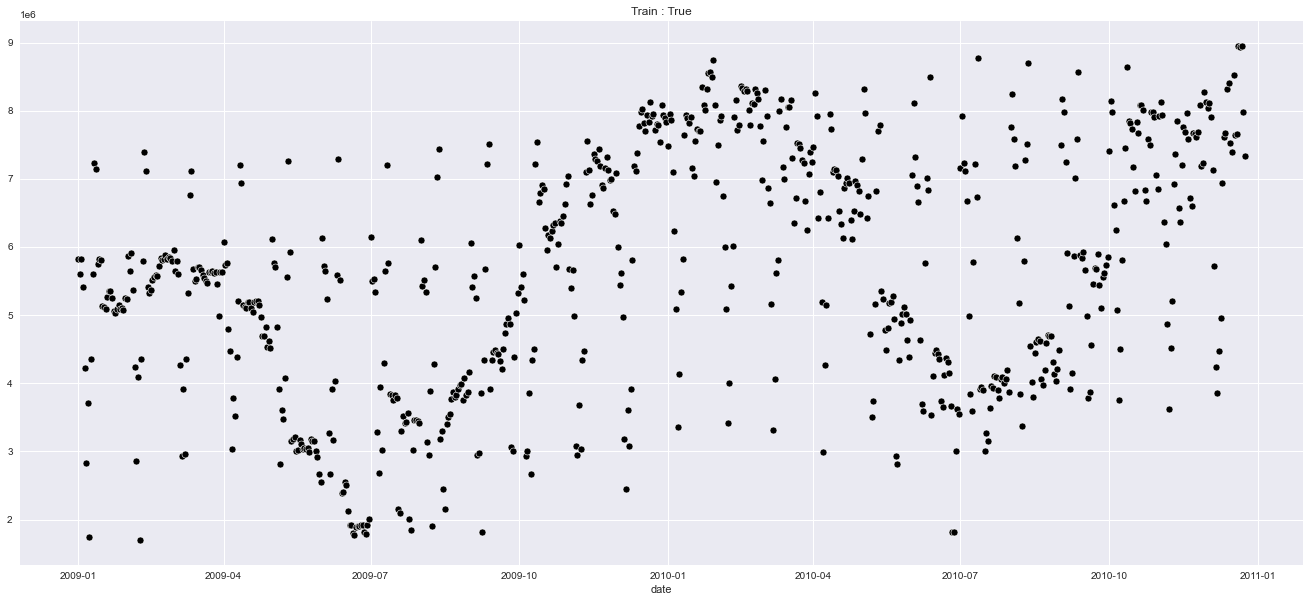

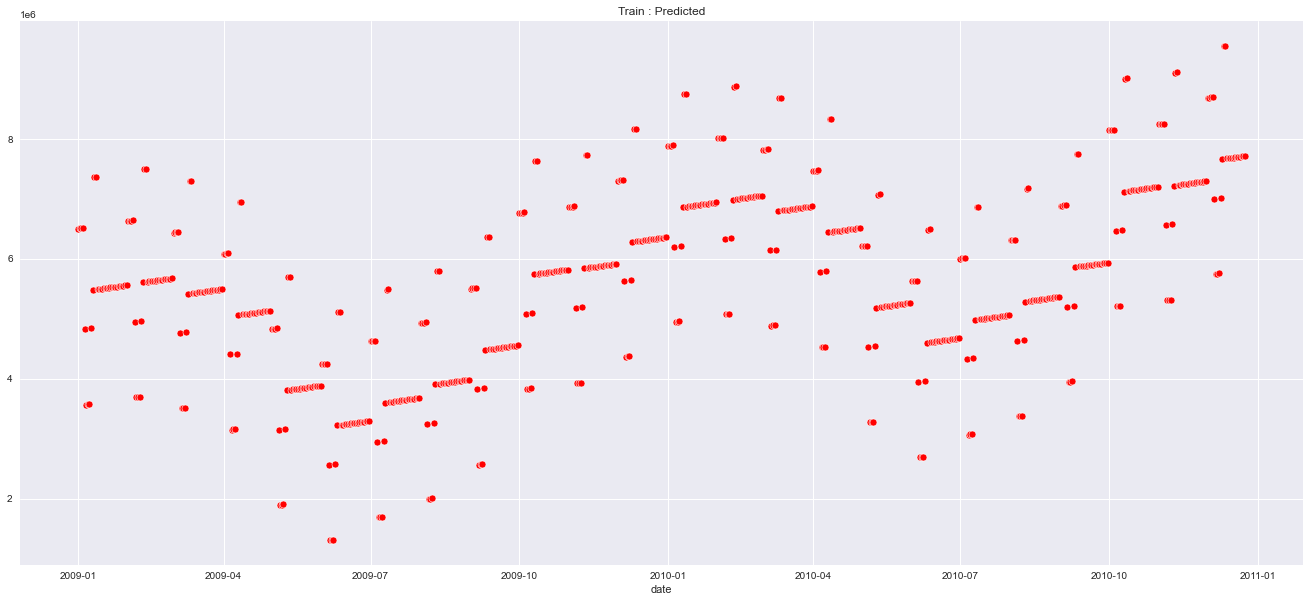

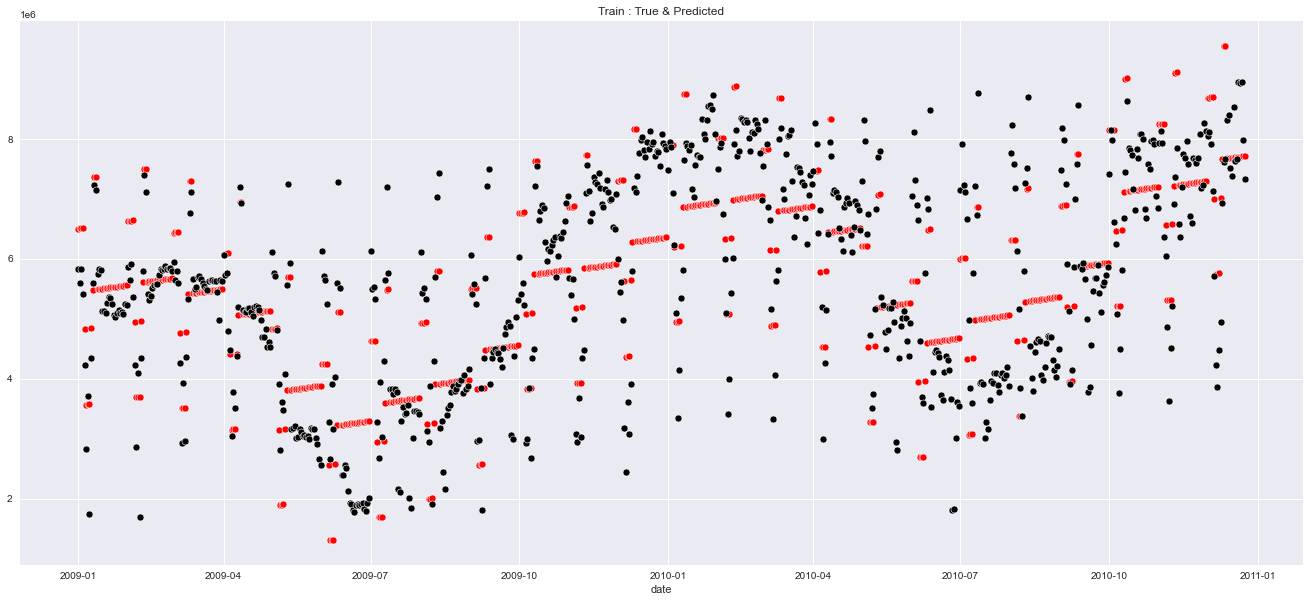

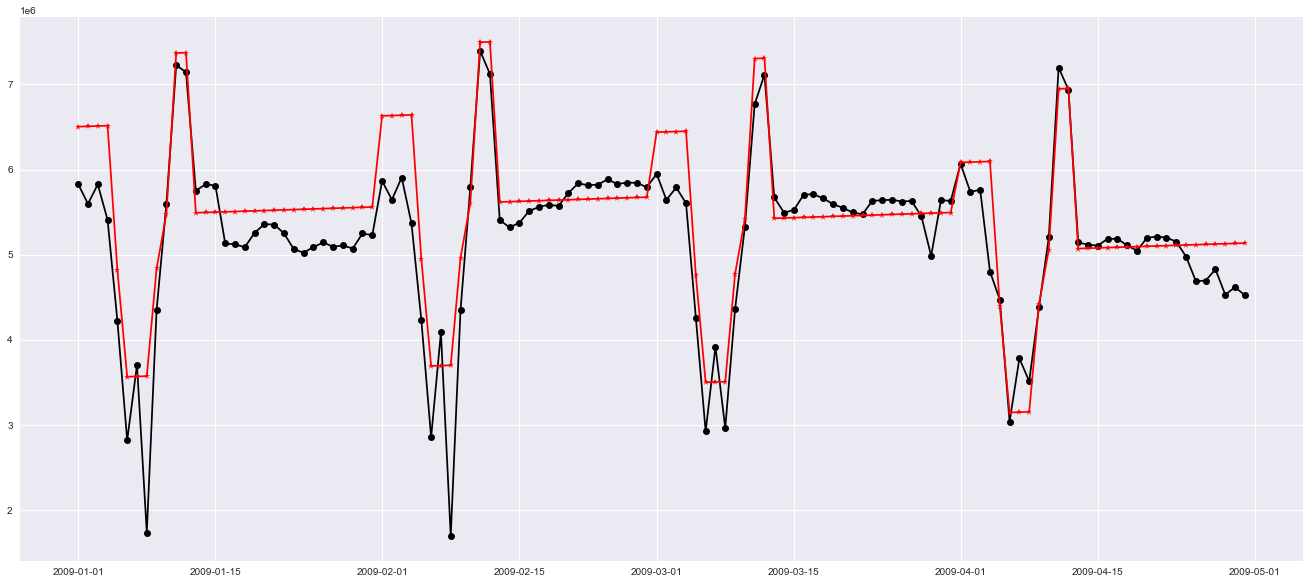

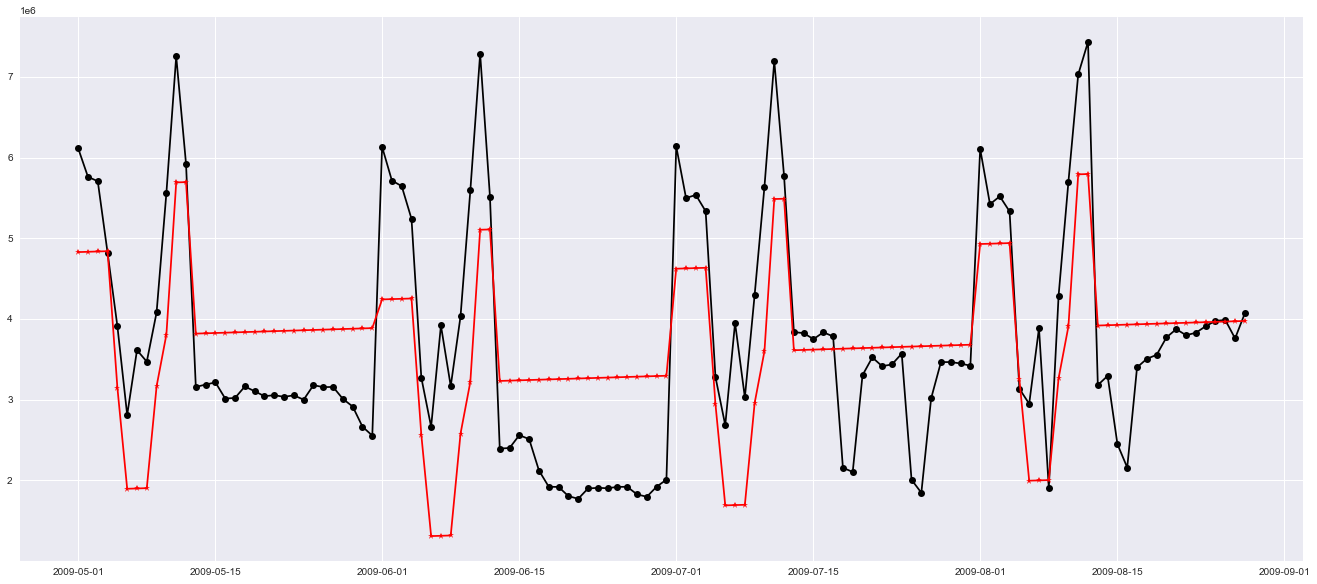

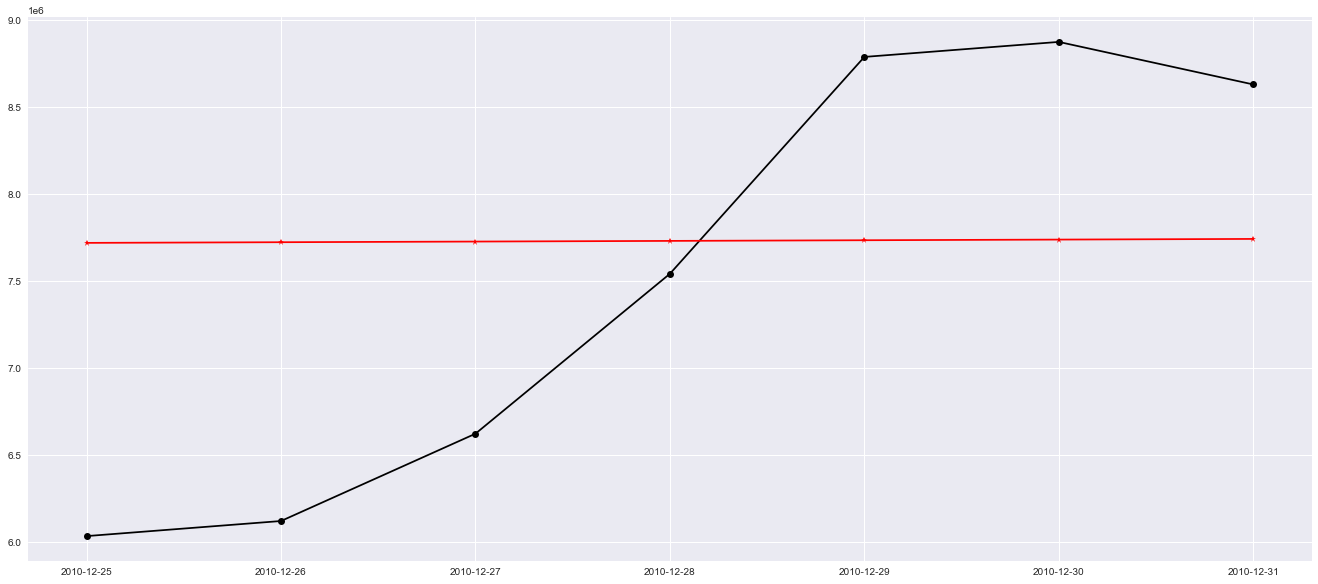

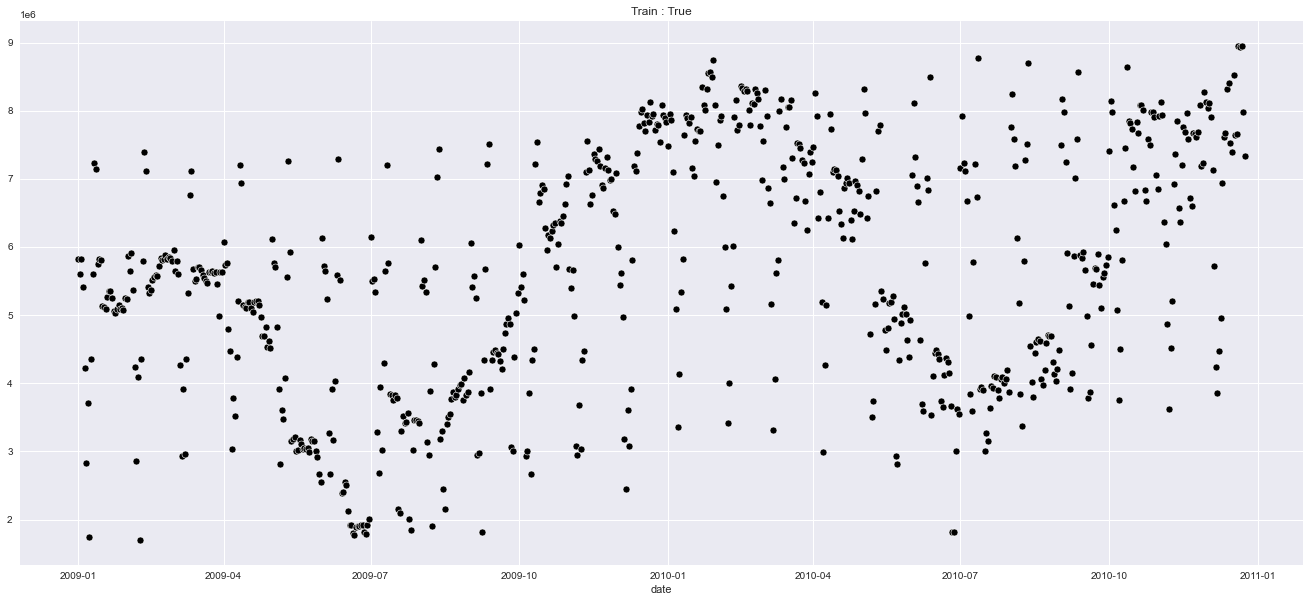

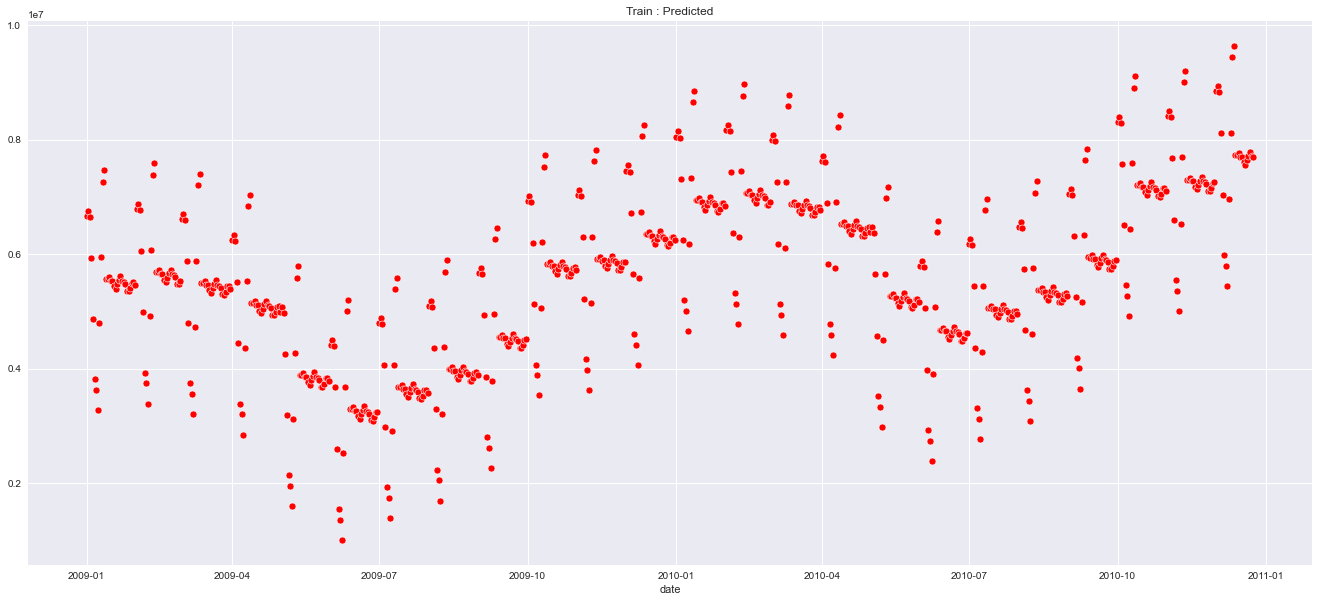

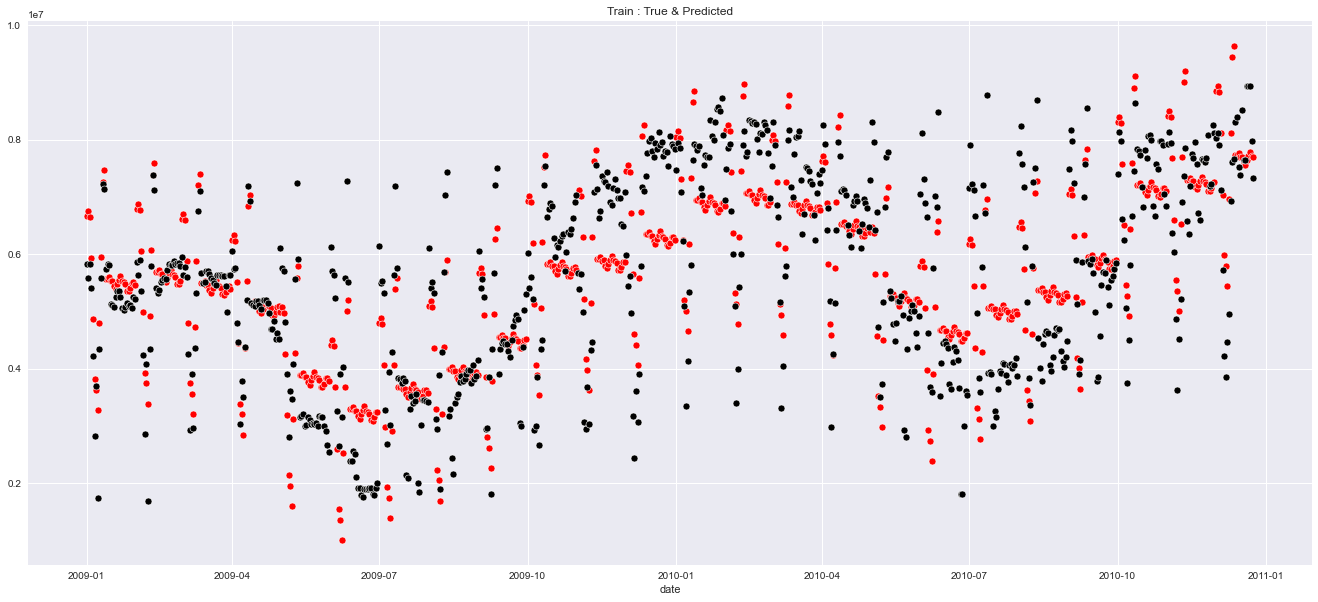

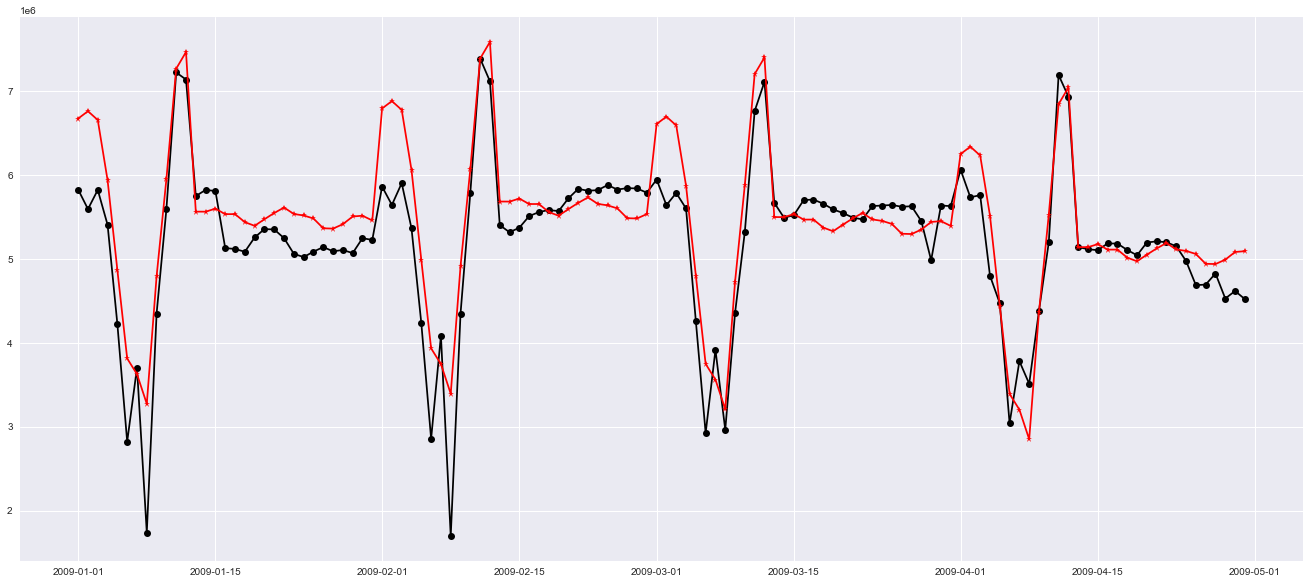

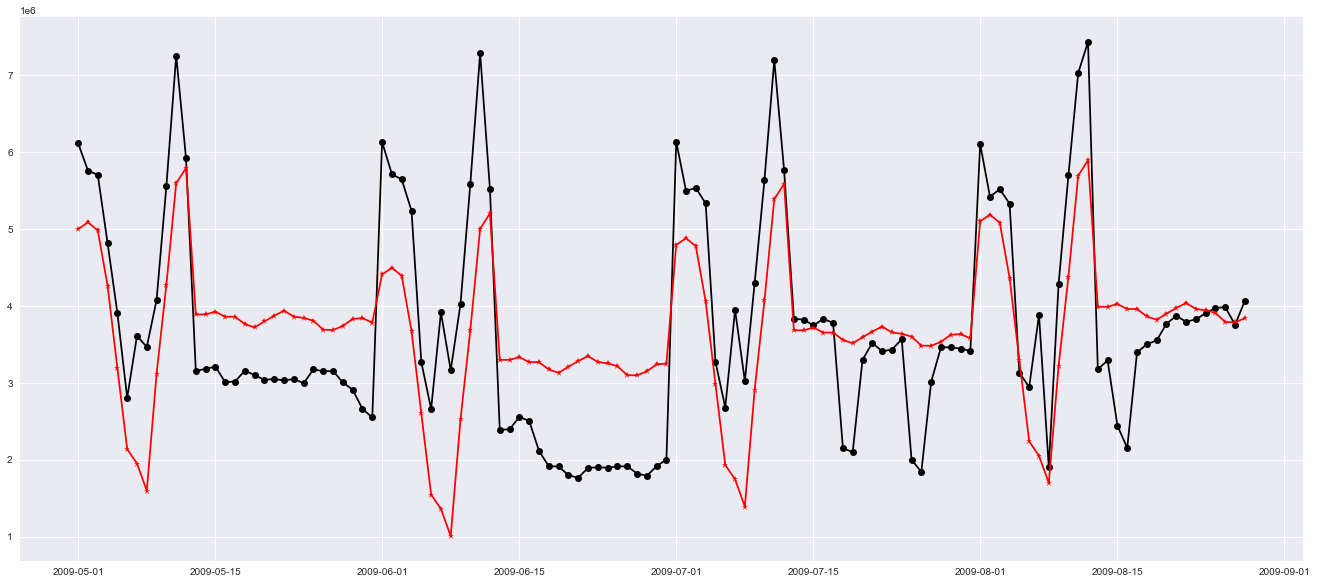

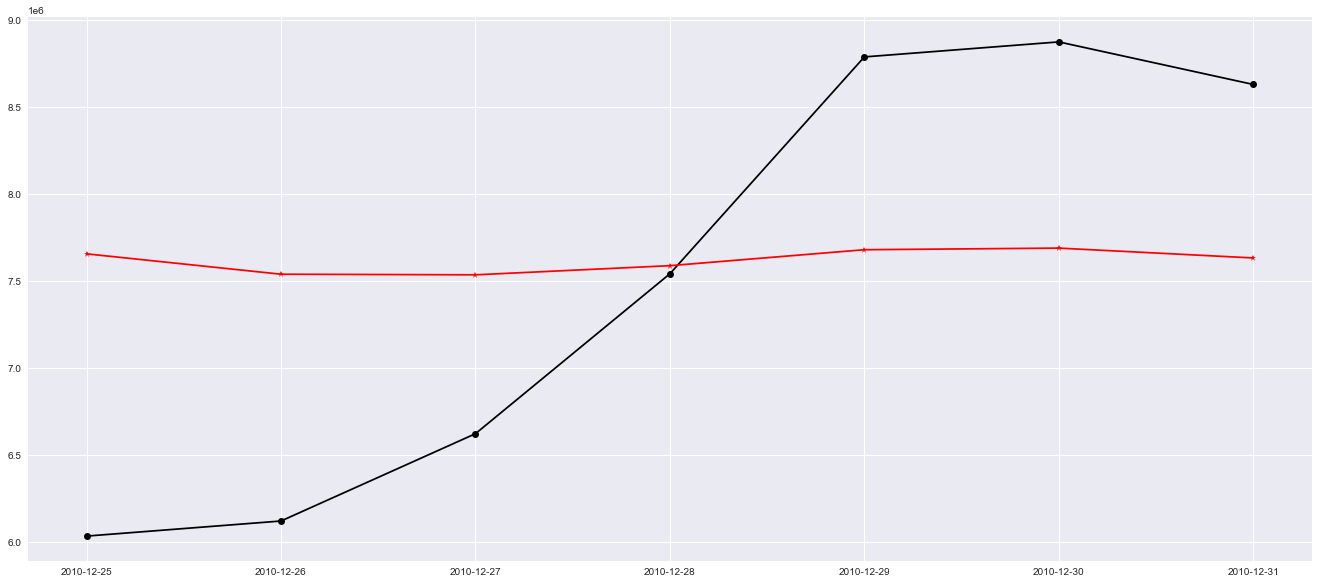

In [27]:
for i, fun in enumerate([day_type, day_type2]):
    trans = My_transformer2(fun)
    X_train = trans.fit_transform(train_df)
    X_test = trans.transform(test_df)
    
    est = LinearRegression()
    est.fit(X_train, y_train)
    
    print(f'Модель {i + 1}:')
    print('\tРазмер признакового пространства', X_train.shape)
    
    print('\tmse(train):', np.sqrt(mean_squared_error(y_train, est.predict(X_train))))
    print('\tmse(test):', np.sqrt(mean_squared_error(y_test, est.predict(X_test))))
    
    print('\tr2(train):', r2_score(y_train, est.predict(X_train)))
    print('\tr2(test):', r2_score(y_test, est.predict(X_test)))
    
    print('\tmape(train):', mean_absolute_percentage_error(y_train, est.predict(X_train)))
    print('\tmape(test):', mean_absolute_percentage_error(y_test, est.predict(X_test)))
    
    plt.figure(figsize=(23, 10))
    sns.scatterplot(x=train_df['date'], y=y_train, color='black')
    plt.title('Train : True')
    
    plt.figure(figsize=(23, 10))
    sns.scatterplot(x=train_df['date'], y=est.predict(X_train), color='red')
    plt.title('Train : Predicted')
    
    plt.figure(figsize=(23, 10))
    sns.scatterplot(x=train_df['date'], y=est.predict(X_train), color='red')
    sns.scatterplot(x=train_df['date'], y=y_train, color='black')
    plt.title('Train : True & Predicted')
    
    plt.figure(figsize=(23, 10))
    plt.plot(train_df.iloc[0:120]['date'], train_df.iloc[0:120]['target'], marker='o', color='black')
    plt.plot(train_df.iloc[0:120]['date'], est.predict(X_train[0:120]), marker='*', color='red')
    
    plt.figure(figsize=(23, 10))
    plt.plot(train_df.iloc[120:240]['date'], train_df.iloc[120:240]['target'], marker='o', color='black')
    plt.plot(train_df.iloc[120:240]['date'], est.predict(X_train[120:240]), marker='*', color='red')
    
    plt.figure(figsize=(23, 10))
    plt.plot(test_df['date'], test_df['target'], marker='o', color='black')
    plt.plot(test_df['date'], est.predict(X_test), marker='*', color='red')